# Exploratory Data Analysis (EDA) for the Realistic ASHA Dataset

This notebook explores the `truly_realistic_dataset.csv` file. The goal is to understand the more complex, noisy, and overlapping relationships between features now that the data is no longer deterministic.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Set plot style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

# Load the new, realistic dataset
df = pd.read_csv('truly_realistic_dataset.csv')

### 2. Initial Data Inspection

In [2]:
print("First 5 rows of the dataset:")
display(df.head())
print("\nDataset Information:")
df.info()
print("\nSummary statistics (numerical columns are all boolean in this set):")
display(df.describe())

First 5 rows of the dataset:


,State,District,WaterSourceType,SanitationLevels,Fever,Vomiting,AbdominalPain,RecentTravelHistory,CommunityNotes,OutbreakStatus
0,Arunachal Pradesh,West Kameng,RainwaterHarvest,Poor,False,False,False,False,Several children have a fever.,High_Risk
1,Meghalaya,East Khasi Hills,RainwaterHarvest,Average,False,False,False,False,Waste disposal is overflowing.,Low_Risk
2,Manipur,Imphal East,HandPump,Good,False,False,False,True,Water supply is regular.,Low_Risk
3,Manipur,Churachandpur,TapWater,Poor,True,False,False,False,New handpump installed.,High_Risk
4,Tripura,West Tripura,RainwaterHarvest,Good,False,False,False,False,Water supply is regular.,Low_Risk



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   State                5000 non-null   object
 1   District             5000 non-null   object
 2   WaterSourceType      5000 non-null   object
 3   SanitationLevels     5000 non-null   object
 4   Fever                5000 non-null   bool  
 5   Vomiting             5000 non-null   bool  
 6   AbdominalPain        5000 non-null   bool  
 7   RecentTravelHistory  5000 non-null   bool  
 8   CommunityNotes       5000 non-null   object
 9   OutbreakStatus       5000 non-null   object
dtypes: bool(4), object(6)
memory usage: 254.0+ KB

Summary statistics (numerical columns are all boolean in this set):


,State,District,WaterSourceType,SanitationLevels,Fever,Vomiting,AbdominalPain,RecentTravelHistory,CommunityNotes,OutbreakStatus
count,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000
unique,7,14,4,3,2,2,2,2,12,2
top,Arunachal Pradesh,West Kameng,TapWater,Poor,False,False,False,False,Water supply is regular.,Low_Risk
freq,731,390,1286,1705,3982,4274,4263,4482,511,2860


### 3. Target Variable Analysis

Let's see how balanced our target `OutbreakStatus` is. A perfectly balanced dataset isn't realistic, so we expect some variation, which is a good sign.

C:\Users\tarun\AppData\Local\Temp\ipykernel_9480\890976049.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='OutbreakStatus', data=df, palette='viridis', order=['Low_Risk', 'High_Risk'])


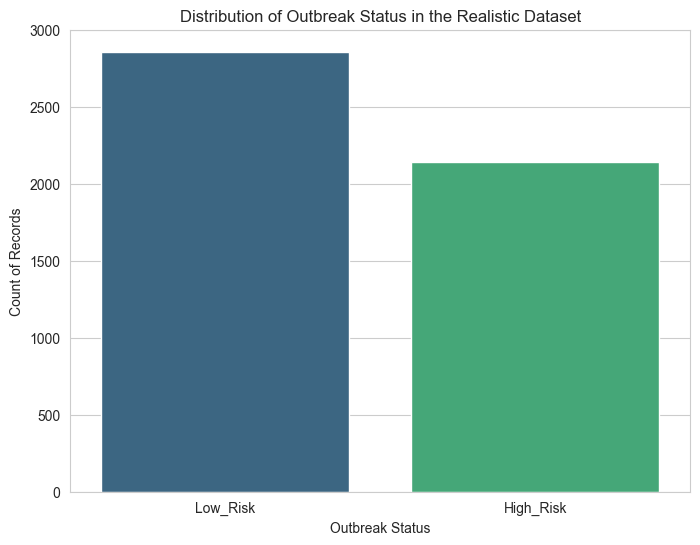

In [3]:
plt.figure(figsize=(8, 6))
sns.countplot(x='OutbreakStatus', data=df, palette='viridis', order=['Low_Risk', 'High_Risk'])
plt.title('Distribution of Outbreak Status in the Realistic Dataset')
plt.xlabel('Outbreak Status')
plt.ylabel('Count of Records')
plt.show()

### 4. Categorical Feature Analysis

How do features like sanitation and water source relate to the outbreak status? In a realistic dataset, we expect to see strong trends but not perfect separation. For example, 'Poor' sanitation should mostly be 'High_Risk', but not always.

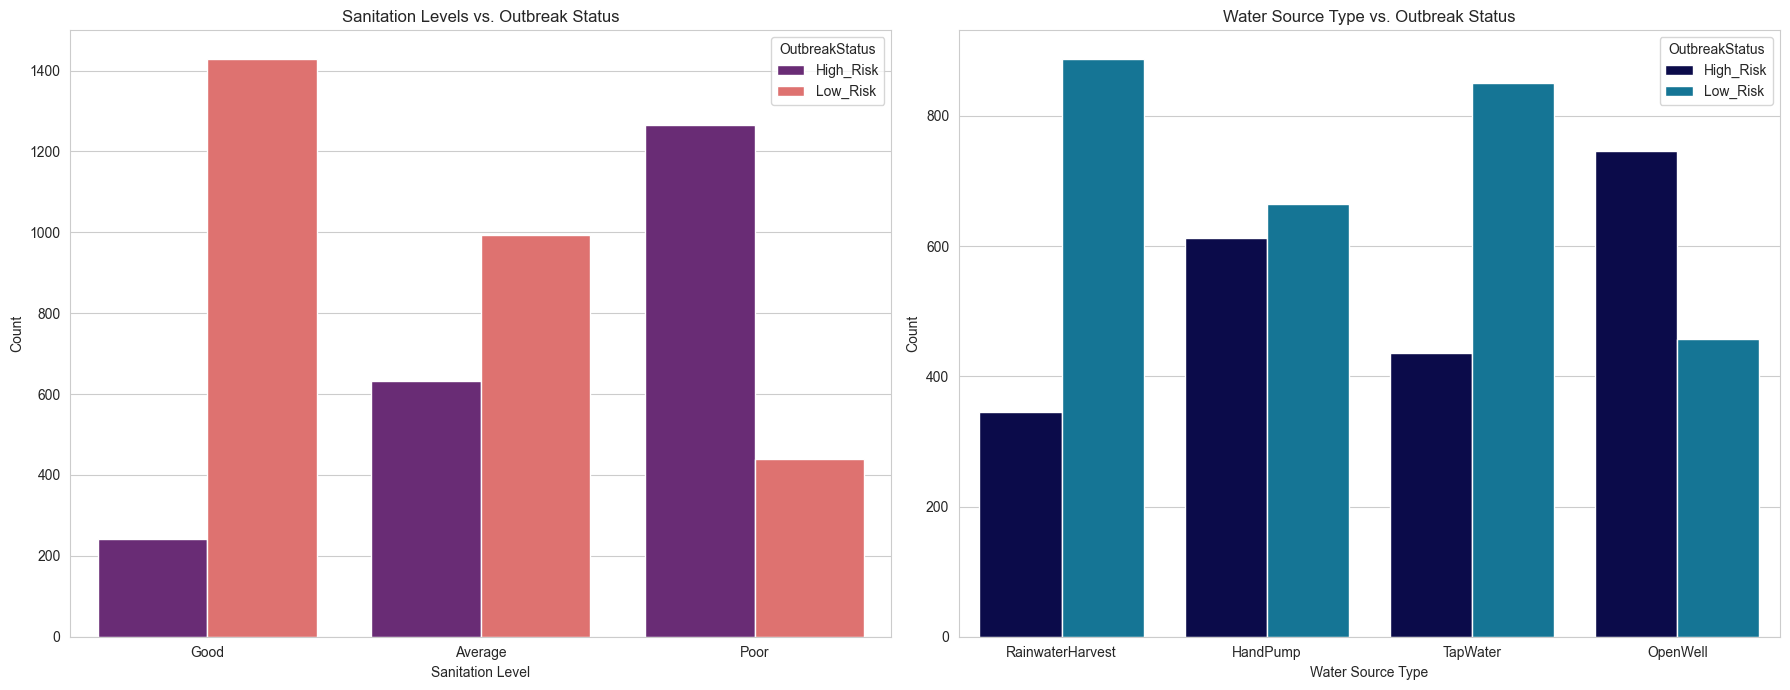

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# Sanitation Levels vs. Outbreak Status
sns.countplot(x='SanitationLevels', hue='OutbreakStatus', data=df, palette='magma', ax=ax1, order=['Good', 'Average', 'Poor'])
ax1.set_title('Sanitation Levels vs. Outbreak Status')
ax1.set_xlabel('Sanitation Level')
ax1.set_ylabel('Count')

# Water Source Type vs. Outbreak Status
sns.countplot(x='WaterSourceType', hue='OutbreakStatus', data=df, palette='ocean', ax=ax2)
ax2.set_title('Water Source Type vs. Outbreak Status')
ax2.set_xlabel('Water Source Type')
ax2.set_ylabel('Count')

plt.tight_layout()
plt.show()

### 5. Symptom Analysis

Let's check the relationship between reported symptoms and the final outbreak status. The presence of a symptom should increase the likelihood of a 'High_Risk' status.

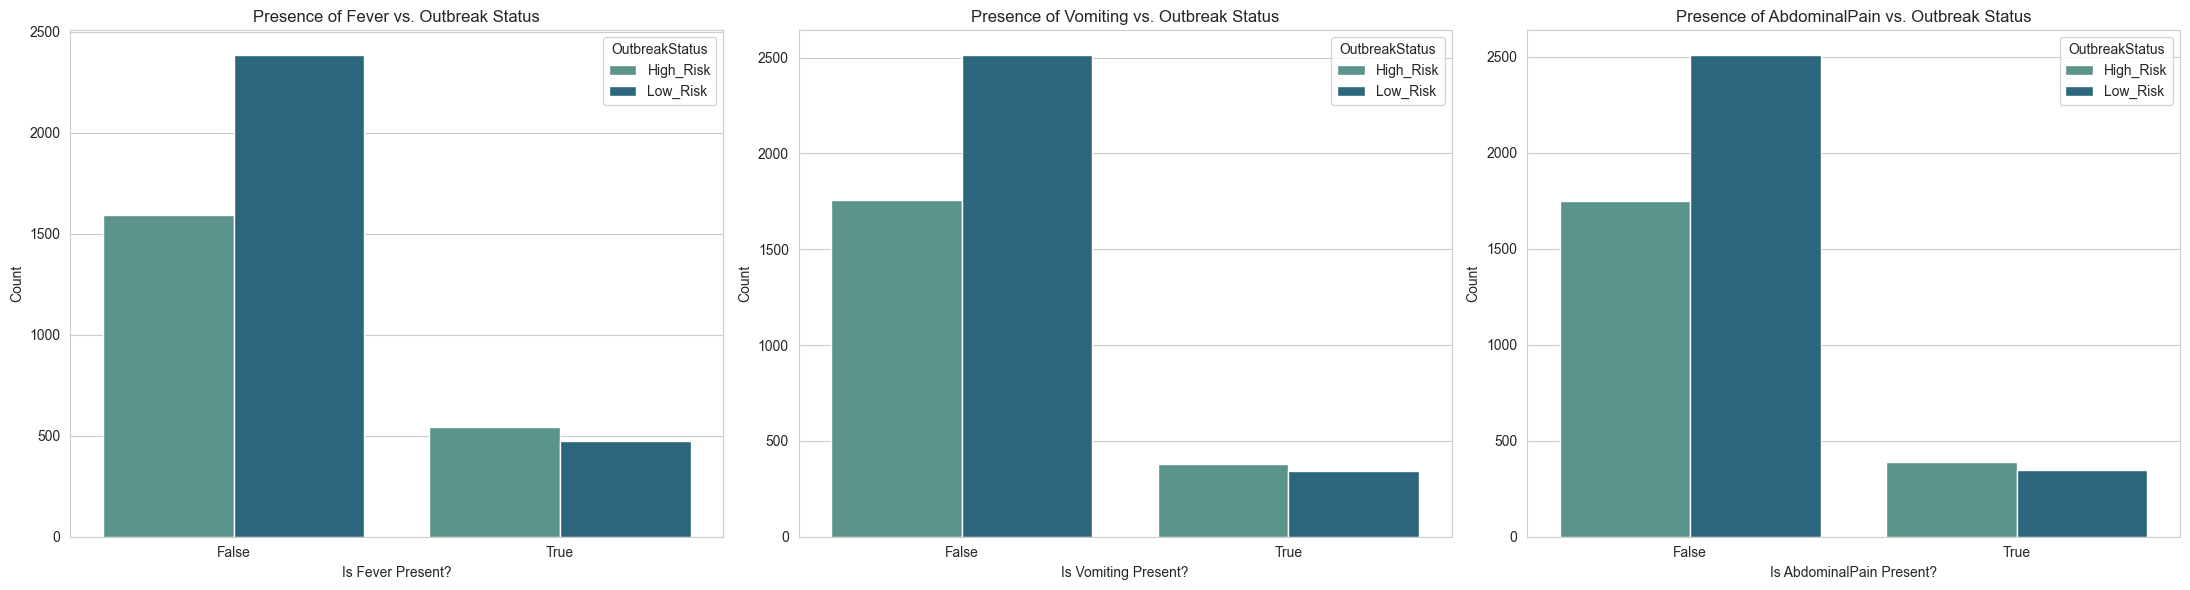

In [5]:
symptom_cols = ['Fever', 'Vomiting', 'AbdominalPain']

fig, axes = plt.subplots(1, 3, figsize=(22, 6))

for i, col in enumerate(symptom_cols):
    sns.countplot(x=col, hue='OutbreakStatus', data=df, ax=axes[i], palette='crest')
    axes[i].set_title(f'Presence of {col} vs. Outbreak Status')
    axes[i].set_xlabel(f'Is {col} Present?')
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

### 6. Text Data Analysis: Community Notes

With the new noisy data, the word clouds should still show different themes, but we might see some overlap. For example, a 'High_Risk' situation might occasionally have a neutral or positive-sounding note.

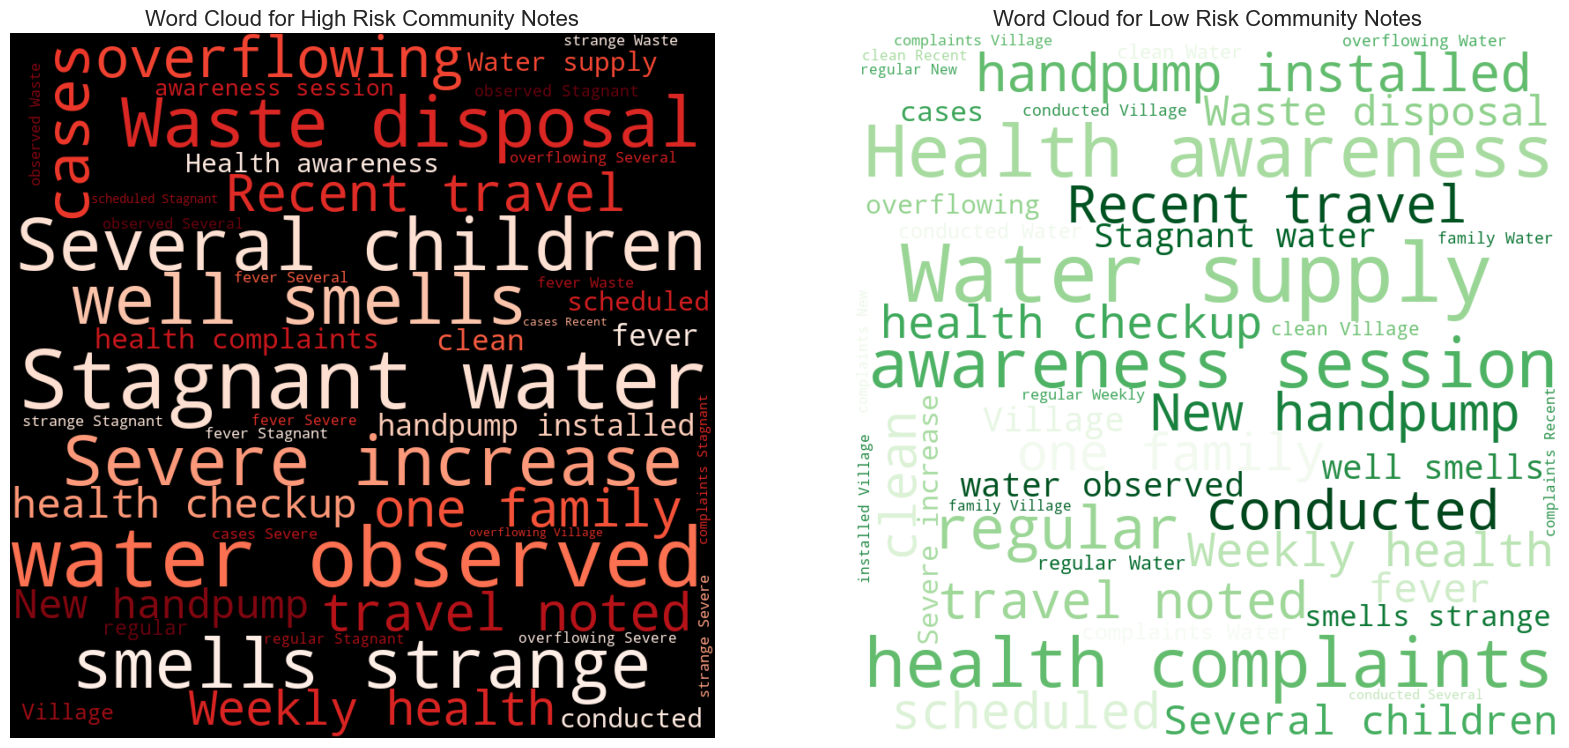

In [6]:
high_risk_text = ' '.join(df[df['OutbreakStatus'] == 'High_Risk']['CommunityNotes'])
low_risk_text = ' '.join(df[df['OutbreakStatus'] == 'Low_Risk']['CommunityNotes'])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# High Risk Word Cloud
wordcloud_high = WordCloud(width=800, height=800, background_color='black', colormap='Reds').generate(high_risk_text)
ax1.imshow(wordcloud_high, interpolation='bilinear')
ax1.set_title('Word Cloud for High Risk Community Notes', fontsize=16)
ax1.axis('off')

# Low Risk Word Cloud
wordcloud_low = WordCloud(width=800, height=800, background_color='white', colormap='Greens').generate(low_risk_text)
ax2.imshow(wordcloud_low, interpolation='bilinear')
ax2.set_title('Word Cloud for Low Risk Community Notes', fontsize=16)
ax2.axis('off')

plt.show()

### 7. EDA Summary

1.  **Imbalance**: The target variable is no longer perfectly balanced, which is more realistic. There are more 'Low_Risk' instances than 'High_Risk'.
2.  **Probabilistic Relationships**: The charts clearly show that features like 'Poor' sanitation and 'OpenWell' water sources are strongly *correlated* with 'High_Risk' status, but they are not perfect predictors. There is now overlap, which is exactly what a machine learning model is designed to handle.
3.  **Text Insights**: The word clouds confirm that the vocabulary is different between the two classes. Words like 'fever', 'stagnant', and 'smells' are more common in high-risk notes, while 'clean' and 'health' dominate low-risk notes, providing a strong signal for an NLP model.